## Predictive Analysis

### Linear Regression with Differential Privacy

In [85]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [13]:
product_=pd.read_csv(r'C:\Users\Jaya Karthi Booven\Desktop\DiffPriv\Dataset\olist_products_dataset.csv')
item_= pd.read_csv(r'C:\Users\Jaya Karthi Booven\Desktop\DiffPriv\Dataset\olist_order_items_dataset.csv')
category_=pd.read_csv(r'C:\Users\Jaya Karthi Booven\Desktop\DiffPriv\Dataset\product_category_name_translation.csv')

In [14]:
temp_ = product_.join(category_.set_index('product_category_name'), on='product_category_name')
mergeddata=item_.join(temp_.set_index('product_id'), on='product_id')
df=mergeddata.drop(['order_id','product_id','seller_id','product_category_name'], axis=1)
df.head()

,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,1,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,1,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,1,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,1,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


### Feature Selection

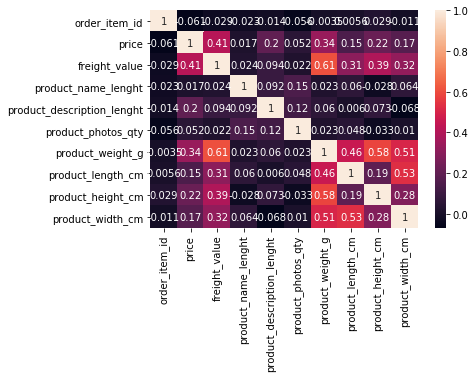

In [17]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

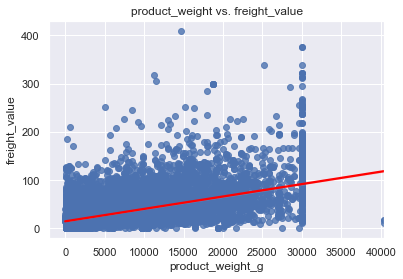

In [32]:
sn.set(color_codes=True)
ax = sn.regplot(x="product_weight_g", y="freight_value", data=df,scatter_kws = {'color': 'b'}, line_kws = {'color': 'red'})
plt.title('product_weight vs. freight_value')
plt.show()

Product_weight and freight_value are positively correlated. That is, each item has the freight calculated accordingly to its weight.

### Simple Linear Regression 

In [157]:
df=df.dropna()
X=df['product_weight_g'].values.reshape(-1,1) 
Y=df['freight_value'].values.reshape(-1,1)

In [158]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Linear Equation:')
print('freight_value='+str(regr.intercept_)+' + '+str(regr.coef_)+' * product_weight')
print('')
new_product_weight=np.array([30000.0]).reshape(-1,1)
print('Prediction:')
print('new_product_weight:'+str(new_product_weight))
print('Predicted freight_value:',regr.predict(new_product_weight))

Linear Equation:
freight_value=[14.6096456] + [[0.0025791]] * product_weight

Prediction:
new_product_weight:[[30000.]]
Predicted freight_value: [[91.98255676]]


In [154]:
import statsmodels.api as sm
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 6.625e+04
Date:                Tue, 26 May 2020   Prob (F-statistic):               0.00
Time:                        04:51:40   Log-Likelihood:            -4.3827e+05
No. Observations:              111022   AIC:                         8.765e+05
Df Residuals:                  111020   BIC:                         8.766e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6096      0.043    338.902      0.0

### Differentially Private Linear Regression

In [142]:
df=df.dropna()
X = df['product_weight_g'].values.reshape(-1,1)
Y = df['freight_value'].values.reshape(-1,1)

In [146]:
from diffprivlib.models.linear_regression import LinearRegression
reg=LinearRegression(epsilon=1,data_norm=None, range_X=None, range_y=None, copy_X=True)
reg.fit(X, Y)
print('Differentially Private Linear Equation:')
print('freight_value='+str(reg.intercept_)+' + '+str(reg.coef_)+' * product_weight')
print('')
new_product_weight=np.array([30000.0]).reshape(-1,1)
print('Prediction:')
print('new_product_weight:'+str(new_product_weight))
print('Predicted freight_value:',reg.predict(new_product_weight))

Differentially Private Linear Equation:
freight_value=[14.28410477] + [[0.00273544]] * product_weight

Prediction:
new_product_weight:[[30000.]]
Predicted freight_value: [[96.34734475]]
